In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inputImage = cv2.imread("../images/ex01.jpg")

150065.0


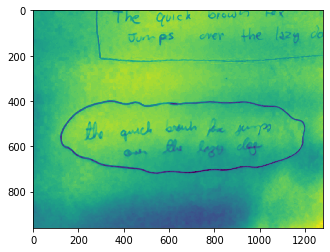

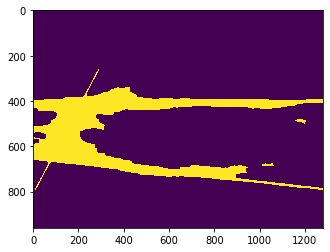

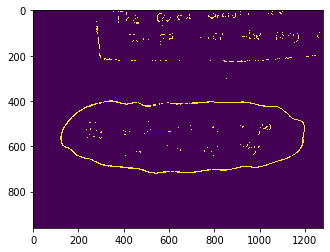

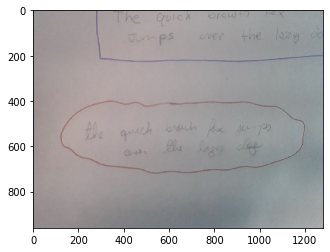

In [4]:
image = inputImage

blur = cv2.medianBlur(image, 7)
# blur = image
# gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)

gray = blur[:, :, 2] # noss... que merda eu fiz...
gray2 = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) # neet to draw on this onw for some reason
MASK = np.zeros_like(gray, dtype = np.uint8)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)
thresh = 255 - thresh
t = thresh




# Threshold of blue in HSV space 
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
# lower_blue = np.array([160, 45, 0]) 
# upper_blue = np.array([255, 255, 255])
lower_blue = np.array([80, 25, 0]) 
upper_blue = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_blue, upper_blue) 
# thresh = cv2.bitwise_and(thresh, thresh, mask = mask) 
thresh = mask

# canny = cv2.Canny(thresh, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17,17))
kernel11x = cv2.morphologyEx(kernel11, cv2.MORPH_DILATE, kernel2, iterations = 3)

# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 10)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel11x, iterations = 2)



# t = cv2.morphologyEx(t, cv2.MORPH_GRADIENT, kernel, iterations = 1)
# t = cv2.morphologyEx(t, cv2.MORPH_OPEN, kernel2, iterations = 3)


minLineLength = 1 # set to min to allow more smoothness
maxLineGap = 5 # larger values can cause more blocky segment and can merge wrong elements
lines = cv2.HoughLinesP(mask,cv2.HOUGH_PROBABILISTIC, np.pi/180, 2, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        d = (pts[1] - pts[0]) * 1 # Escalar com a imagem!! Pegue uma proporção da figura
        pts = np.array([pts[0] - d, pts[1] + d], np.int32)
        cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 2) # connects very well

minLineLength = 1
maxLineGap = 5
lines = cv2.HoughLinesP(MASK,cv2.HOUGH_PROBABILISTIC, np.pi/360, 20, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        d = (pts[1] - pts[0]) * 1 # Escalar com a imagem!! Pegue uma proporção da figura
        pts = np.array([pts[0] - d, pts[1] + d], np.int32)
        cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 1)   
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel, iterations = 2)
        
cnts, hierarchy = cv2.findContours(MASK, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 10 ** 5
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        print(area)
        cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
        continue
        
# MASK = cv2.morphologyEx(MASK, cv2.MORPH_OPEN, kernel, iterations = 8)


# cv2.imshow('image', image)
# # cv2.imwrite('image.png', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(gray)
plt.show()

plt.imshow(MASK)
plt.show()

plt.imshow(t)
plt.show()

plt.imshow(inputImage)
plt.show()

570821.0


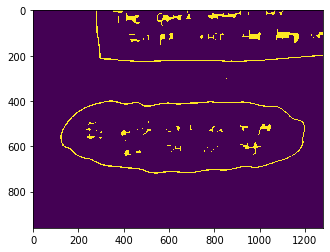

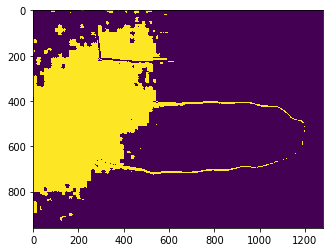

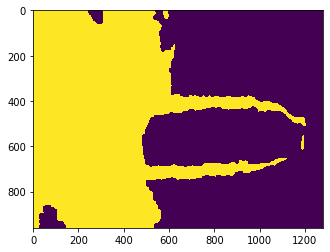

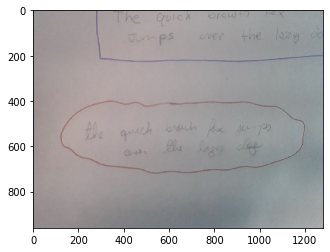

In [28]:
image = inputImage

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17,17))
kernel11x = cv2.morphologyEx(kernel11, cv2.MORPH_DILATE, kernel2, iterations = 3)

blur = cv2.medianBlur(image, 7)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# gray = blur[:, :, 2] # noss... que merda eu fiz...

MASK = np.zeros_like(gray, dtype = np.uint8)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,3)
thresh = 255 - thresh

thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel11x, iterations = 1) 

# plt.imshow(thresh)
# plt.show()


hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
# lower = np.array([160, 45, 0]) 
# upper = np.array([255, 255, 255])
lower = np.array([90, 15, 60]) 
upper = np.array([150, 255, 255])
hsv_filtered = cv2.inRange(hsv, lower, upper)

# plt.imshow(hsv_filtered)
# plt.show()

# thresh = cv2.bitwise_and(thresh, thresh, mask = mask) 

# canny = cv2.Canny(thresh, 120, 255, 1)

# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 10)
# closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel11x, iterations = 2)

# t = cv2.morphologyEx(t, cv2.MORPH_GRADIENT, kernel, iterations = 1)
# t = cv2.morphologyEx(t, cv2.MORPH_OPEN, kernel2, iterations = 3)


minLineLength = 1 # set to min to allow more smoothness
maxLineGap = 5 # larger values can cause more blocky segment and can merge wrong elements
lines = cv2.HoughLinesP(hsv_filtered,cv2.HOUGH_PROBABILISTIC, np.pi/180, 2, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        d = (pts[1] - pts[0]) * 1 # Escalar com a imagem!! Pegue uma proporção da figura
        pts = np.array([pts[0] - d, pts[1] + d], np.int32)
        cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 2) # connects very well

minLineLength = 1
maxLineGap = 5
lines = cv2.HoughLinesP(MASK,cv2.HOUGH_PROBABILISTIC, np.pi/360, 20, minLineLength,maxLineGap)
lines = lines if type(lines) != "NoneType" else []
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        d = (pts[1] - pts[0]) 
        if np.linalg.norm(d) > 20:
            continue
        d = d * 1 # Escalar com a imagem!! Pegue uma proporção da figura
        pts = np.array([pts[0] - d, pts[1] + d], np.int32)
        cv2.polylines(MASK, [pts], True, (255,255,255), 3)
        
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel11x, iterations = 1)   
MASK = cv2.morphologyEx(MASK, cv2.MORPH_CLOSE, kernel, iterations = 2)
        
cnts, hierarchy = cv2.findContours(MASK, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

min_area = 10 ** 5
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        print(area)
        cv2.drawContours(MASK,[c], 0, (255, 255, 255), -1)
        continue
        
# MASK = cv2.morphologyEx(MASK, cv2.MORPH_OPEN, kernel, iterations = 8)


plt.imshow(thresh)
plt.show()

plt.imshow(hsv_filtered)
plt.show()

plt.imshow(MASK)
plt.show()

# plt.imshow(thresh)
# plt.show()

plt.imshow(inputImage)
plt.show()

In [200]:
green = np.uint8([[[0,0,255 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[  0 255 255]]]
